<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/2_Predictive_Modeling_for_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 - Predictive Modeling for Agriculture

## Project Description

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `Nitrogen` content ratio in the soil
- `Phosphorous` content ratio in the soil
- `Potassium` content ratio in the soil
- `pH` value of the soil

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the "crop" column is the optimal choice for that field.

In this project, you will build multi-class classification models to predict the type of "crop" and identify the single most importance feature for predictive performance.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from scipy.special import softmax

## The Data

In [2]:
data_url = 'https://drive.google.com/uc?id=11EhMXLeyJUgfCxUKq8UrHc7sipobpDPt'
crops = pd.read_csv(data_url)
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [3]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


## EDA

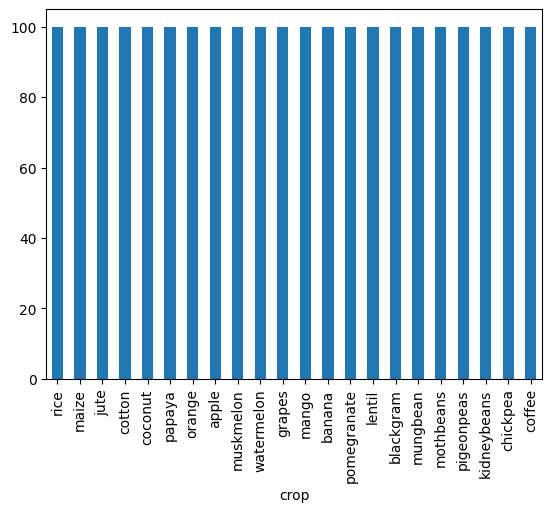

In [4]:
crops['crop'].value_counts().plot(kind='bar');

In [5]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


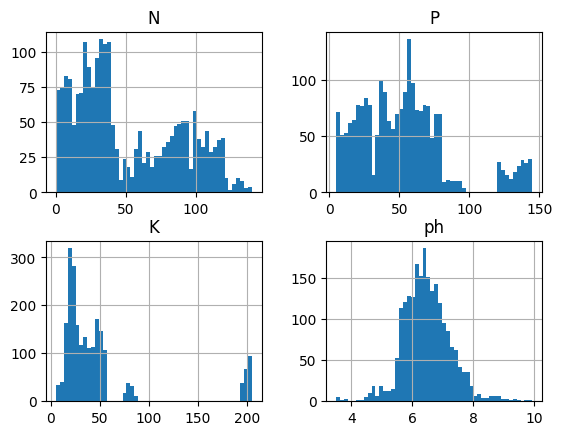

In [6]:
crops.hist(bins=50);

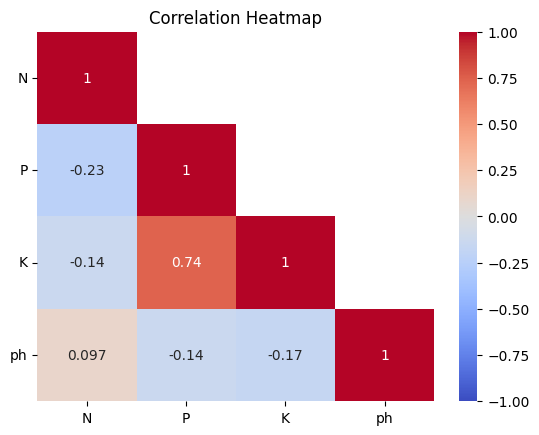

In [7]:
corr_matrix = crops.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_matrix))
np.fill_diagonal(mask, 0)

sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot=True)

plt.title('Correlation Heatmap')
plt.yticks(rotation=0)
plt.show()

## Preprocessing

In [8]:
X = crops.drop('crop', axis=1)
y = crops['crop']

In [9]:
# label encoding is common practices before train_test_split
#. - ensures consistent label mapping across train and test data
#. - leakage is only a concern for feature enoding, not target encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(y_encoded)

[20 20 20 ...  5  5  5]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=crops['crop'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1540, 4), (660, 4), (1540,), (660,))

## The Model

In [11]:
model = make_pipeline(MinMaxScaler(),
                      LogisticRegression(solver='lbfgs', max_iter=100))
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 9, 16, 10, 11,  8, 18, 17, 19,  5, 11,  6, 17,  4, 16, 19,  1, 10,
        3, 10,  6, 16, 15,  1,  9, 10, 17, 20, 16,  9,  0, 12, 15, 16, 19,
       16, 20,  9,  6, 10,  0,  9,  7,  4, 15,  6,  9, 11, 17, 16,  6, 12,
        9, 15, 10,  0,  1,  0,  6,  1,  4, 10,  3,  1, 10,  4, 20,  9, 19,
        5, 11, 16, 15,  5,  1,  3, 20, 15,  2, 11,  2,  0,  6,  0, 16,  3,
        2,  9,  8,  6,  4, 10, 15,  0,  7,  1,  0,  0, 19, 10, 17,  5,  1,
        5, 15, 10,  3,  0, 15, 19, 17, 16,  9, 19,  0,  6, 21, 19,  8,  6,
       12, 14, 18, 16,  7, 15, 19, 19,  6, 16,  3, 19, 19, 16, 18,  9, 15,
       14, 15, 18,  0, 11, 12, 16,  5, 10,  5,  8,  7, 12, 16,  5,  9, 15,
       19, 18, 10, 10,  8, 19,  9, 11, 10,  2,  4, 16, 15,  5, 18, 10, 15,
       20,  3,  0,  9,  0, 21, 15,  9, 13,  8,  6,  3,  6, 20, 20,  1,  9,
        3, 11,  4,  2, 18,  5, 17, 12, 21, 21, 15, 15, 15,  7,  2, 16, 10,
       15,  4,  4,  8, 15,  6,  9, 21, 13,  7, 11,  4,  9, 19, 16,  0,  7,
       21, 16,  6, 16,  2

## Confusion Matrix

In [13]:
conf_m = metrics.confusion_matrix(y_test, y_pred)
conf_m

array([[15,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,
         2,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  8,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [18,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  2,  0, 10,  0,  0,  2,  0,  0,  0,  3,
         0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,

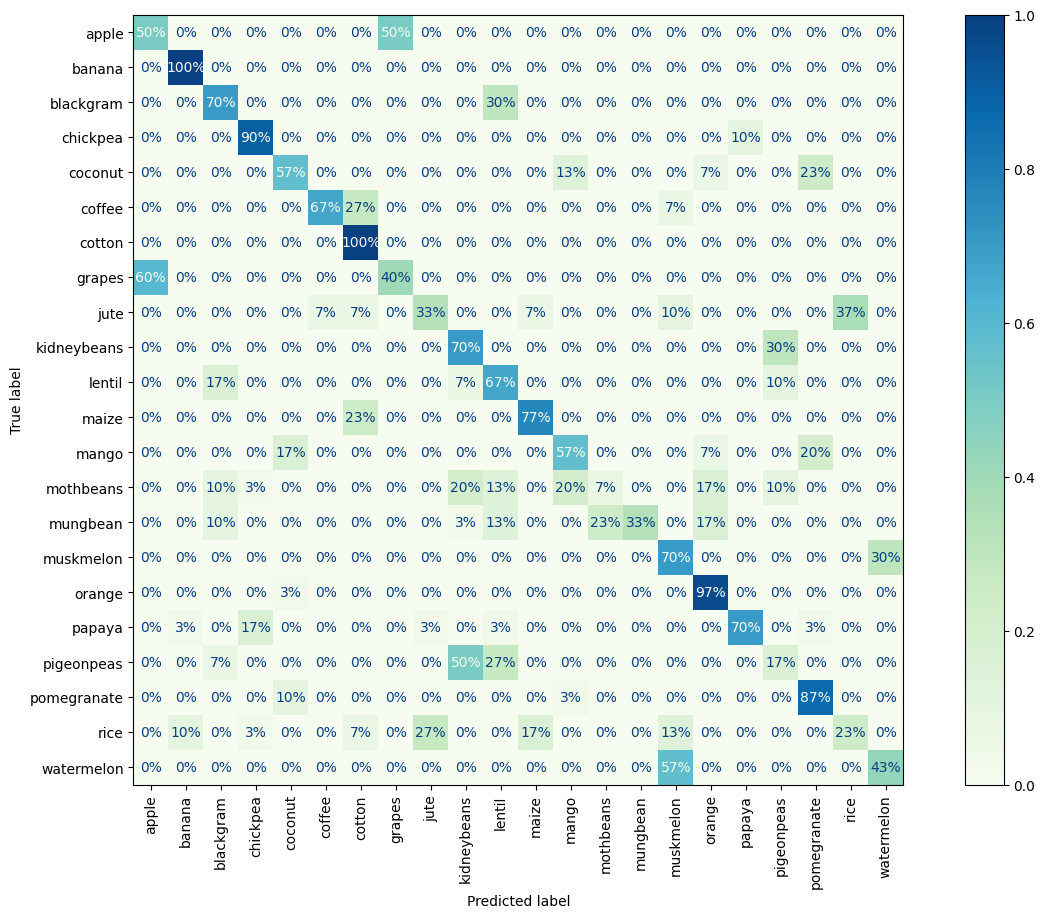

In [14]:
fig, ax = plt.subplots(figsize=(16, 10))
conf_m = metrics.confusion_matrix(encoder.inverse_transform(y_test),
                                  encoder.inverse_transform(y_pred),
                                  normalize='true',
                                  labels=encoder.classes_)
metrics.ConfusionMatrixDisplay(conf_m,
                               display_labels=encoder.classes_).plot(ax=ax,
                                                                     values_format='.0%',
                                                                     cmap=plt.cm.GnBu)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## Manual calculation of the predictions using the `.coef_` attribute

$$
Z = X_{test} \cdot W^{T} + b
$$

- $Z$ is the **logit score** (before probability transformation
- $W$ is the `.coef_` attribute
- $b$ is the bias term

In [15]:
scaler = model.named_steps['minmaxscaler']
logreg = model.named_steps['logisticregression']

X_test_scaled = scaler.transform(X_test)

W = logreg.coef_
b = logreg.intercept_

In [16]:
W.T.shape

(4, 22)

In [17]:
X_test_scaled.shape, W.T.shape, b.shape

((660, 4), (4, 22), (22,))

In [18]:
Z = X_test_scaled @ W.T + b
print(Z.shape)
Z

(660, 22)


array([[-0.54401283, -0.61483149,  1.64912965, ..., -0.09976913,
        -0.21010588, -3.10587662],
       [-2.27559591, -3.38094496,  1.46927073, ...,  1.49208975,
        -0.48056125, -1.56607058],
       [-1.7140405 , -1.66016583,  1.58739008, ...,  0.37448372,
        -0.12714819, -1.91430803],
       ...,
       [ 6.23463527,  3.21784494,  0.22971893, ..., -0.26894231,
         0.9314815 , -1.79848761],
       [-2.4976641 ,  0.69711854, -0.92603524, ..., -0.05953214,
         1.70886405,  2.52931558],
       [-1.01844204, -0.02173152,  0.89335428, ..., -0.19992314,
         0.60649548, -0.72389792]])

In [19]:
probs = softmax(Z, axis=1)
print(probs.shape)
probs

(660, 22)


array([[8.87838954e-03, 8.27138124e-03, 7.95799885e-02, ...,
        1.38441654e-02, 1.23979002e-02, 6.85063593e-04],
       [1.76527102e-03, 5.84472925e-04, 7.46769049e-02, ...,
        7.64005492e-02, 1.06263725e-02, 3.58884189e-03],
       [4.36070396e-03, 4.60207906e-03, 1.18399451e-01, ...,
        3.52039301e-02, 2.13174464e-02, 3.56928741e-03],
       ...,
       [4.24187577e-01, 2.07674202e-02, 1.04629926e-03, ...,
        6.35462741e-04, 2.11070494e-03, 1.37662929e-04],
       [1.34768690e-03, 3.28901215e-02, 6.48841690e-03, ...,
        1.54332099e-02, 9.04609134e-02, 2.05484250e-01],
       [1.33433722e-02, 3.61519292e-02, 9.02709869e-02, ...,
        3.02512861e-02, 6.77590014e-02, 1.79136665e-02]])

In [20]:
y_pred_manual = np.argmax(probs, axis=1)
y_pred_manual

array([ 9, 16, 10, 11,  8, 18, 17, 19,  5, 11,  6, 17,  4, 16, 19,  1, 10,
        3, 10,  6, 16, 15,  1,  9, 10, 17, 20, 16,  9,  0, 12, 15, 16, 19,
       16, 20,  9,  6, 10,  0,  9,  7,  4, 15,  6,  9, 11, 17, 16,  6, 12,
        9, 15, 10,  0,  1,  0,  6,  1,  4, 10,  3,  1, 10,  4, 20,  9, 19,
        5, 11, 16, 15,  5,  1,  3, 20, 15,  2, 11,  2,  0,  6,  0, 16,  3,
        2,  9,  8,  6,  4, 10, 15,  0,  7,  1,  0,  0, 19, 10, 17,  5,  1,
        5, 15, 10,  3,  0, 15, 19, 17, 16,  9, 19,  0,  6, 21, 19,  8,  6,
       12, 14, 18, 16,  7, 15, 19, 19,  6, 16,  3, 19, 19, 16, 18,  9, 15,
       14, 15, 18,  0, 11, 12, 16,  5, 10,  5,  8,  7, 12, 16,  5,  9, 15,
       19, 18, 10, 10,  8, 19,  9, 11, 10,  2,  4, 16, 15,  5, 18, 10, 15,
       20,  3,  0,  9,  0, 21, 15,  9, 13,  8,  6,  3,  6, 20, 20,  1,  9,
        3, 11,  4,  2, 18,  5, 17, 12, 21, 21, 15, 15, 15,  7,  2, 16, 10,
       15,  4,  4,  8, 15,  6,  9, 21, 13,  7, 11,  4,  9, 19, 16,  0,  7,
       21, 16,  6, 16,  2

In [21]:
np.array_equal(y_pred_manual, y_pred)

True

## Feature Importances

In [22]:
importance = np.abs(logreg.coef_.mean(axis=0))
importance

array([9.68921912e-16, 1.21115239e-15, 3.02788098e-16, 1.05975834e-15])

In [23]:
importances_df = pd.DataFrame({'Feature': model.feature_names_in_,
                               'Importance': importance})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
1,P,1.211152e-15
3,ph,1.059758e-15
0,N,9.689219e-16
2,K,3.027881e-16


## Correct Solution

That was fun and I learned a lot, but it was not what the DataCamp project wanted. I calcuated the most important feature when all four features are used to train the model. What we actually need is the best feauture when each feature is used in isolation.

In [24]:
X = crops.drop('crop', axis=1)
y = crops['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1540, 4), (660, 4), (1540,), (660,))

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
features_dict = {}

for i, feature in enumerate(['N', 'P', 'K', 'pH']):
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train[:, i].reshape(-1, 1), y_train)
    y_pred = model.predict(X_test[:, i].reshape(-1, 1))
    feature_performance = metrics.f1_score(y_test, y_pred, average='weighted')
    print(f'F1-score for {feature}:{feature_performance}')
    features_dict[feature] = feature_performance

features_dict

F1-score for N:0.07040392642854974
F1-score for P:0.07921552682422249
F1-score for K:0.10130269903010265
F1-score for pH:0.02145888328023246


{'N': 0.07040392642854974,
 'P': 0.07921552682422249,
 'K': 0.10130269903010265,
 'pH': 0.02145888328023246}

In [27]:
max_key = max(features_dict, key=features_dict.get)
best_predictive_feature = {max_key: features_dict[max_key]}
best_predictive_feature

{'K': 0.10130269903010265}